In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import statsmodels.api as sm
from statsmodels.api import OLS

from scipy import sparse

import pickle

from IPython.display import display, HTML, Markdown

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

from recommender import plot_cm, get_results, show_results, IO, show_summaries, get_X
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise, RS_sklearn

/Users/gwungwun/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
city = 'Champaign'
fig_dir = 'figs/modeling/{}/'.format(city)
data_dir = 'data/{}/'.format(city)

dfb = pd.read_pickle(data_dir + 'business.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')

X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + 'data_split.pkl').read_pickle()

X_train = get_X(X_train, dfb, dfu)
X_test = get_X(X_test, dfb, dfu)
X_cv = get_X(X_cv, dfb, dfu)

IO(data_dir + '05_data_split.pkl').to_pickle([X_train, y_train, X_test, y_test, X_cv, y_cv])

del dfb
del dfu

In [4]:
X_subset = sm.add_constant(X_train)
ols_sm = sm.OLS(y_train, X_subset)
fit_sm = ols_sm.fit()
print(fit_sm.summary())

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

In [ ]:
is_significant = fit_sm.pvalues < 0.05
sig_vars = [name for i, name in enumerate(inter_predictors) if is_significant[i]]
print('There are {} statistically significant coefficients (p < 0.05):'.format(len(sig_vars))) 6 print('\n'.join(['{}: value {}; standard error {}; p-value {}'.\
format(name, result.params[is_significant][i], result.bse[is_significant][i], \ 8 result.pvalues[is_significant][i])\
9 for i, name in enumerate(sig_vars)]))


In [5]:
es = RS_sklearn(estimator=RidgeCV()).fit(X_train, y_train)

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Ridge regression

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Fitting time: 0.3360 s.  
            RMSE on training set: 1.0749.  
            RMSE on test set: 1.1002.  
            $R^2$ on training set: 0.4364.   
            $R^2$ on test set: 0.4249.  
            Classification accuracy on training set: 0.3853.  
            Classification accuracy on test set: 0.3955.
            

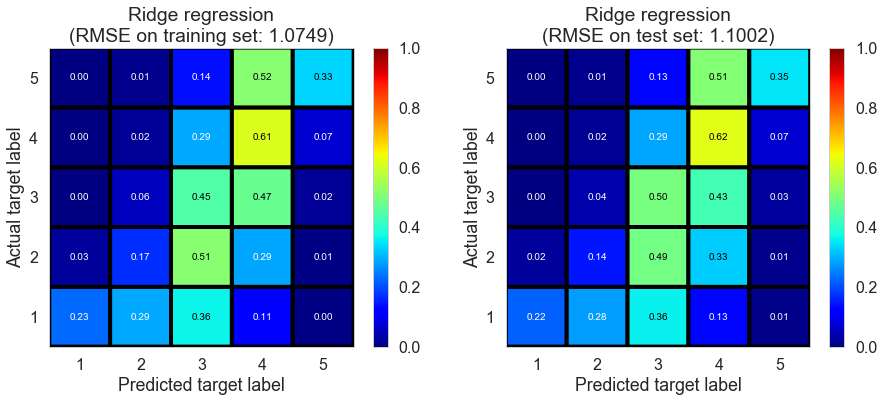

In [6]:
show_results(es, 'Ridge regression', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
             show_cv=False)

In [6]:
es = RS_sklearn(LogisticRegressionCV(class_weight='balanced')).fit(X_train, y_train)

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Logistic regression

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Fitting time: 9.0598 s.  
            RMSE on training set: 1.4045.  
            RMSE on test set: 1.4036.  
            $R^2$ on training set: 0.0378.   
            $R^2$ on test set: 0.0638.  
            Classification accuracy on training set: 0.4754.  
            Classification accuracy on test set: 0.4706.
            

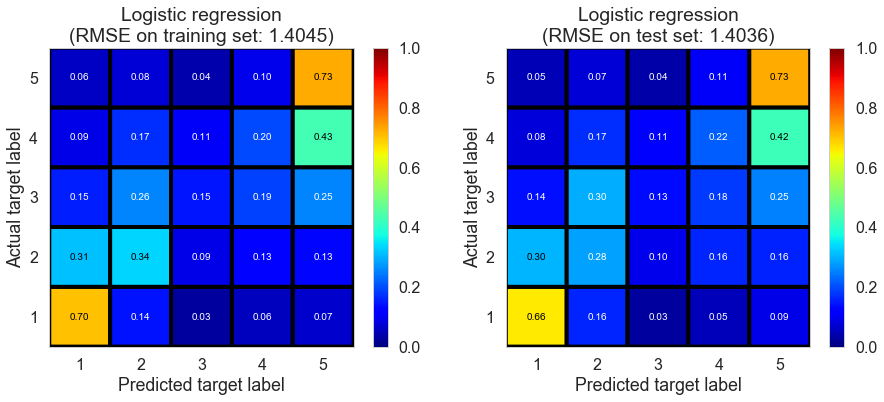

In [7]:
show_results(es, 'Logistic regression', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
             show_cv=False)

In [7]:
es = RS_sklearn(RandomForestRegressor(n_estimators=50, max_depth=7)).fit(X_train, y_train)

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Random forest regressor

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Fitting time: 2.7156 s.  
            RMSE on training set: 1.0227.  
            RMSE on test set: 1.0868.  
            $R^2$ on training set: 0.4898.   
            $R^2$ on test set: 0.4388.  
            Classification accuracy on training set: 0.4163.  
            Classification accuracy on test set: 0.4115.
            

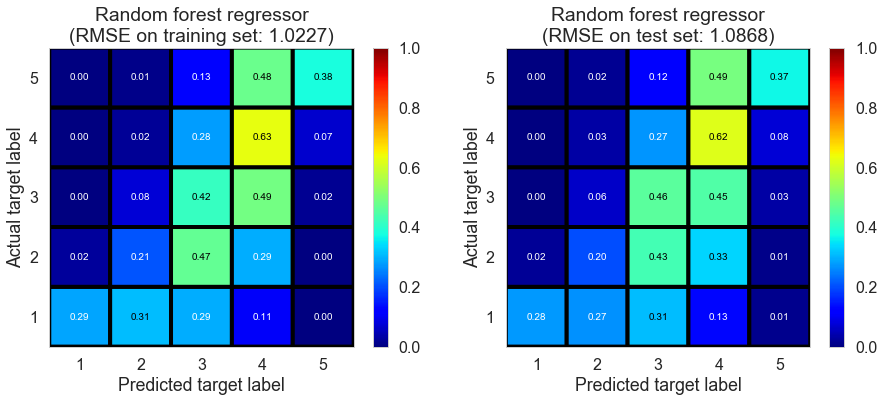

In [8]:
show_results(es, 'Random forest regressor', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
             show_cv=False)